Command Profile in TVB
----------------------

This is a simple demo showing for to interract with TVB in the command profile.

More examples can be found here:
https://github.com/the-virtual-brain/tvb-framework/tree/master/tvb/interfaces/command/demos

In [1]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.COMMAND_PROFILE)
from tvb.interfaces.command.lab import *

2019-11-15 08:55:16,579 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.time_series.TimeSeries.labels_dimensions = Attr(field_type=<class 'dict'>, default={}, required=True)
2019-11-15 08:55:16,672 - INFO - numexpr.utils - NumExpr defaulting to 3 threads.
2019-11-15 08:55:16,692 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.projections.ProjectionMatrix.conductances = Attr(field_type=<class 'dict'>, default={'air': 0.0, 'skin': 1.0, 'skull': 0.01, 'brain': 1.0}, required=False)
2019-11-15 08:55:28,409 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]),

2019-11-15 08:55:34,001 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.linear.Linear.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-1,  1])}, required=True)
2019-11-15 08:55:34,012 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.oscillator.Generic2dOscillator.gamma = NArray(label=':math:`\\gamma`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2019-11-15 08:55:34,015 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.oscillator.Generic2dOscillator.state_variable_range = Final(field_type=<class 'dict'>, default={'V': array([-2.,  4.]), 'W': array([-6.,  6.])}, required=True)
2019-11-15 08:55:34,282 - WARNING - tvb.traits - Field seems mutable and has a default v

In [2]:
list_projects()

                    name    id
2019-11-15 08:58:13,431 - ERROR - tvb.core.entities.storage.session_maker - Could not commit session...
Traceback (most recent call last):
  File "/opt/conda/envs/tvb-run/lib/python3.7/site-packages/sqlalchemy/engine/base.py", line 1182, in _execute_context
    context)
  File "/opt/conda/envs/tvb-run/lib/python3.7/site-packages/sqlalchemy/engine/default.py", line 470, in do_execute
    cursor.execute(statement, parameters)
sqlite3.OperationalError: no such table: PROJECTS

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/root/tvb-root/framework_tvb/tvb/core/entities/storage/session_maker.py", line 372, in dec
    result = func(*args, **kwargs)
  File "/root/tvb-root/framework_tvb/tvb/core/entities/storage/project_dao.py", line 236, in get_all_projects
    result = query.offset(max(page_start, 0)).limit(max(page_size, 0)).all()
  File "/opt/conda/envs/tvb-run/lib/python3.7/site-packages/sqla

OperationalError: (sqlite3.OperationalError) no such table: PROJECTS [SQL: 'SELECT "PROJECTS".id AS "PROJECTS_id", "PROJECTS".name AS "PROJECTS_name", "PROJECTS".description AS "PROJECTS_description", "PROJECTS".last_updated AS "PROJECTS_last_updated", "PROJECTS".fk_admin AS "PROJECTS_fk_admin", "PROJECTS".gid AS "PROJECTS_gid", "PROJECTS".version AS "PROJECTS_version" \nFROM "PROJECTS"\n LIMIT ? OFFSET ?'] [parameters: (20, 0)]

Create a new project to test with

In [ ]:
proj = new_project("sandbox")

If you have the web UI open at the same time, you'll notice there's now a new project named "sandbox"

In [ ]:
list_datatypes(proj.id)

Nothing! Let's import a connectivity

In [ ]:
import os
import tvb_data
p = os.path.join(os.path.dirname(tvb_data.__file__), 'connectivity/connectivity_66.zip')
import_conn_zip(proj.id, p)

In [ ]:
list_datatypes(proj.id)

Now let's grab that connectivity from the database. 
IMPORTANT: Make sure to adjust the DT id below to match the value in the id column above

In [8]:
conn = load_dt(21)
conn

,value
Number of connections,1377
Number of regions,66
Undirected,False
is None,True
"tract_lengths (connections) [min, median, max]","[7, 78.8134, 238]"
"tract_lengths [min, median, max]","[0, 0, 238]"
"tract_lengths-non-zero [min, median, max]","[7, 78.8134, 238]"
"weights [min, median, max]","[0, 0, 0.512165]"
weights dtype,float64
weights shape,"(66, 66)"


and run a simulation with it

In [10]:
sim_op = fire_simulation(proj.id, Simulator(connectivity=conn, simulation_length=100))
wait_to_finish(sim_op)

2019-10-19 17:00:06,524 - INFO - tvb.interfaces.command.lab - Operation launched ....
2019-10-19 17:00:39,282 - INFO - tvb.core.services.backend_client - Finished with launch of operation 12
2019-10-19 17:00:41,822 - INFO - tvb.interfaces.command.lab - Operation finished successfully


We should wait for the simulation to finish, and afterwards, TimeSeries should also be part of this project.

Refresh the Web GUI to see the status of your operation.

In [11]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date
       ConnectivityIndex                     21 c986cf8dcb6a4825aa71d1b02ad1b1f0 2019-10-19 16:59:11.373059
          SimulatorIndex             None    22 9e8f501052fc48d7a7d8c1264774c91b 2019-10-19 17:00:06.018880
  SimulationHistoryIndex                     23 7a8d4115ab534373ba95984c076cb1bd 2019-10-19 17:00:38.703627
   TimeSeriesRegionIndex                     24 f4d189fc1dbf4fcab39442090f1e9f6d 2019-10-19 17:00:38.872877


Populating the interactive namespace from numpy and matplotlib


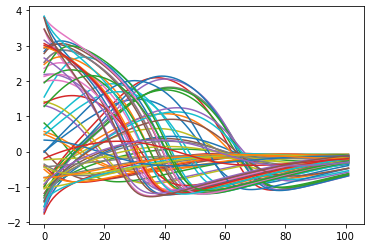

In [12]:
%pylab inline
import matplotlib.pyplot as plt

ts  = load_dt(24)
for reg in range(66):
    plt.plot(ts.data[:, 0, reg, 0])
plt.show()

You can re-evaluate this cell multiple times while it's running to see how the results gradually show up as the simulation finishes.